In [1]:
!pip install opendatasets --upgrade --quiet

In [60]:
import opendatasets as od

In [61]:
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_public.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_schema.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\README.txt


In [62]:
import os

In [63]:
os.listdir('stackoverflow-developer-survey-2020')

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

In [65]:
import pandas as pd

In [66]:
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [67]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [68]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [69]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname,index_col ='Column').QuestionText

In [70]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [71]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

Data Preparation and Cleaning

In [72]:
selected_columns = [
    #demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    #Programming exp
     'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
    
]

In [73]:
len(selected_columns)

20

In [74]:
survey_df = survey_raw_df[selected_columns].copy()

In [ ]:
schema = schema_raw[selected_columns]

: 

In [76]:
survey_df.shape

(64461, 20)

In [77]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [78]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors = 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors ='coerce')

In [79]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


The age column consists of value like 1 and 279 that is not possible, so , we need to drop the columns that contains such values

In [80]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace = True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace = True)

In [81]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace = True)

In [82]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [83]:
import numpy as np

In [84]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [85]:
survey_df['Gender'].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [86]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
53283,Canada,62.0,Man,Some college/university study without earning ...,"A social science (such as anthropology, psycho...",Yes,18.0,3.0,3.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;SQL,Python;Ruby;TypeScript,Every few months,Play games;Call a coworker or friend;Visit Sta...,"Independent contractor, freelancer, or self-em...","Developer, full-stack",40.0,Slightly dissatisfied,Industry that I’d be working in;How widely use...,Often: 1-2 days per week or more,Somewhat important
54096,India,30.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,20.0,16.0,14.0,HTML/CSS;JavaScript;PHP;Python,HTML/CSS;JavaScript;TypeScript,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Database administrator;Designer;Developer, bac...",45.0,Slightly dissatisfied,Industry that I’d be working in;How widely use...,Sometimes: 1-2 days per month but less than we...,Very important
56366,Bulgaria,18.0,Man,Primary/elementary school,NaN,Yes,15.0,4.0,NaN,C#;HTML/CSS;SQL;VBA,Java;JavaScript;Python,Once a year,Visit Stack Overflow;Watch help / tutorial videos,Student,NaN,NaN,NaN,"Flex time or a flexible schedule;Languages, fr...",NaN,NaN
33982,Germany,28.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,13.0,7.0,3.0,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;SQL,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack",7.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Somewhat important
22198,India,27.0,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,15.0,10.0,5.0,HTML/CSS;JavaScript;Python;SQL;TypeScript,Go,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Data or business analyst;Developer, back-end;D...",40.0,Very satisfied,How widely used or impactful my work output wo...,Often: 1-2 days per week or more,Somewhat important
16860,Brazil,33.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",No,16.0,17.0,12.0,Assembly;Bash/Shell/PowerShell;C;C++;HTML/CSS;...,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Database administrator;Developer, back-end;Dev...",40.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Not at all important/not necessary
52949,Canada,44.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,12.0,25.0,20.0,Bash/Shell/PowerShell;C;C++;Haskell;Java;Kotlin,Haskell;Java;Kotlin;Rust;Swift,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end",40.0,Slightly satisfied,"Industry that I’d be working in;Languages, fra...",Occasionally: 1-2 days per quarter but less th...,Fairly important
40542,India,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN
56150,India,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
5452,Israel,21.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,13.0,8.0,NaN,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...,Assembly;Bash/Shell/PowerShell;C;C++;HTML/CSS;...,Every few months,Visit Stack Overflow,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, embedded applic...",NaN,Neither satisfied nor dissatisfied,Industry tha

Data Visualization 

In [100]:
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

The number of countries that are present in the resposes and plot 10 highest number of responses

In [92]:
schema.Country

'Where do you live?'

In [93]:
survey_df.Country.nunique()

183

In [94]:
top_countries = survey_df.Country.value_counts().head(15)

In [95]:
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

<AxesSubplot: title={'center': 'Where do you live?'}, ylabel='Country'>

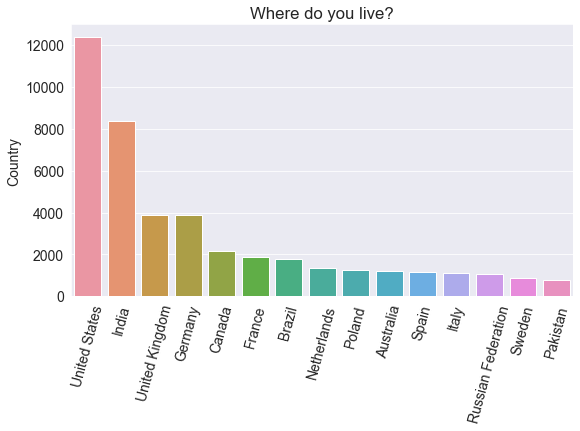

In [98]:
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries)

Age

In [110]:
survey_df.Age.value_counts()

25.0    2660
28.0    2392
30.0    2391
26.0    2372
27.0    2315
        ... 
14.7       1
32.5       1
26.5       1
96.0       1
14.5       1
Name: Age, Length: 105, dtype: int64

(array([  209.,  2419.,  9135., 11938.,  8739.,  5582.,  3031.,  1756.,
         1038.,   622.,   333.,   143.,    75.]),
 array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
        75.]),
 <BarContainer object of 13 artists>)

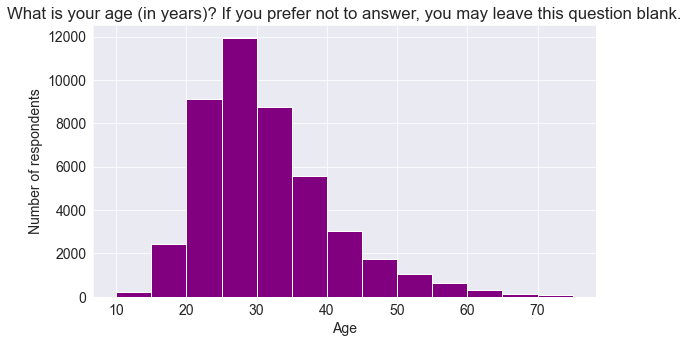

In [107]:
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age,np.arange(10,80,5),color='purple')

pd.cut used to segment and sort values into bins

In [132]:
bins = [0,10,18,30,45,60,61]
labels = ['Less than 10 years', '10-18 years', '18-30 years', '30-45 years', '45-60 years', 'Older than 60 years']
survey_df['AgeGroup'] = pd.cut(survey_df['Age'], bins=bins, labels=labels)

In [135]:
survey_df.AgeGroup.value_counts() 

18-30 years            24272
30-45 years            15431
45-60 years             3034
10-18 years             1816
Older than 60 years       66
Less than 10 years         4
Name: AgeGroup, dtype: int64

In [148]:
survey_df.AgeGroup.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            64451, 64452, 64453, 64454, 64455, 64456, 64457, 64458, 64459,
            64460],
           dtype='int64', length=64306)

<AxesSubplot: title={'center': 'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'}, ylabel='AgeGroup'>

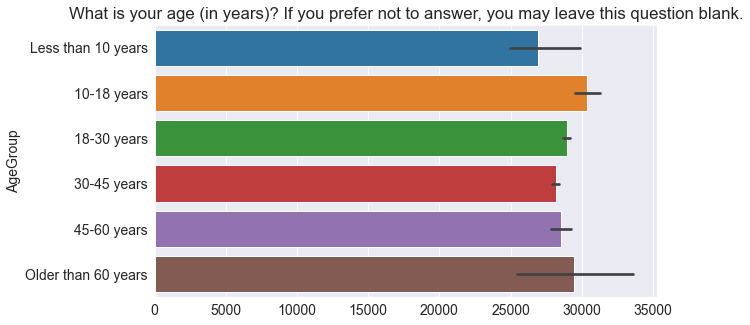

In [142]:
plt.title(schema.Age)


sns.barplot(x=survey_df.AgeGroup.index, y=survey_df.AgeGroup)

Gender

In [143]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [144]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

([<matplotlib.patches.Wedge at 0x1cfc02c5a60>,
 [Text(1.0617335815722195, -0.28761398047005127, 'Man'),
  Text(-1.0544835403587842, 0.3131524598536697, 'Woman'),
  Text(-1.0996796455244597, 0.026545757084685317, 'Non-binary, genderqueer, or gender non-conforming')],
 [Text(0.5791274081303015, -0.1568803529836643, '91.6%'),
  Text(-0.5751728401957005, 0.17081043264745616, '7.7%'),
  Text(-0.5998252611951598, 0.014479503864373808, '0.8%')])

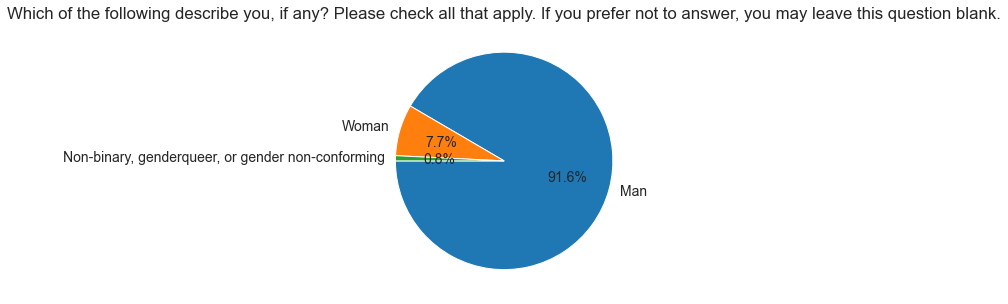

In [150]:
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index,autopct='%1.1f%%',startangle = 180)

Employment

In [152]:
schema.Employment

'Which of the following best describes your current employment status?'

In [154]:
survey_df.Employment.value_counts()

Employed full-time                                      44958
Student                                                  7734
Independent contractor, freelancer, or self-employed     5619
Not employed, but looking for work                       2324
Employed part-time                                       2200
Not employed, and not looking for work                    318
Retired                                                   241
Name: Employment, dtype: int64

<AxesSubplot: title={'center': 'Which of the following best describes your current employment status?'}, xlabel='Counts', ylabel='Employment'>

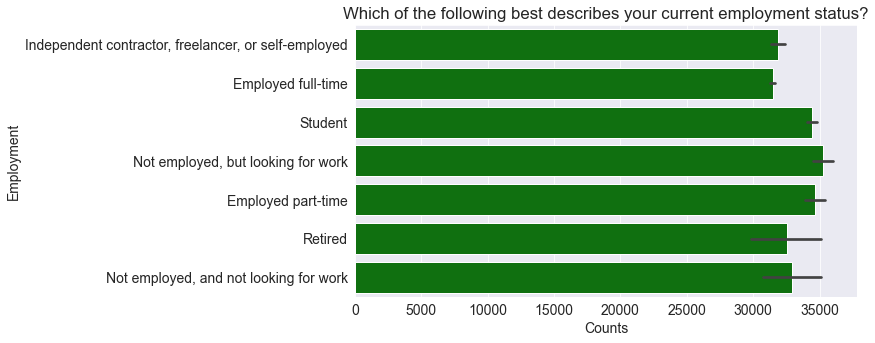

In [161]:
plt.title(schema.Employment)
plt.xlabel("Counts")
sns.barplot(x=survey_df.Employment.index, y=survey_df.Employment,color='g')

In [162]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [163]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               

In [164]:
survey_df.DevType

0        Developer, desktop or enterprise applications;...
1                  Developer, full-stack;Developer, mobile
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
64456                                  Senior executive/VP
64457                                                  NaN
64458                                                  NaN
64459                                                  NaN
64460                                                  NaN
Name: DevType, Length: 64306, dtype: object